In [ ]:
# Importar librerías

import pandas as pd ## Manipulacion de datos
import numpy as np ## Operaciones matematicas y estadisticas
from scipy import stats ## Libreria de estadistica
import seaborn as sns ## Graficos estadisticos
import matplotlib.pyplot as plt ##Graficas generales
import plotly.express as px ## Graficos interactivos

In [ ]:
## Url de la dataset

url = 'https://iadbprod-ite-ito-external-public.s3.us-east-1.amazonaws.com/INE/energyhub/Downloadable+databases/1-Generacion%2C+capacidad+y+consumo+de+electricidad/Generaci%C3%B3n%2C+Capacidad+y+consumo+de+electricidad.xlsx'

## **CREACIÓN DE LOS DF**

In [ ]:
# Cargar los datos desde el archivo Excel
# Se especifica la URL del archivo, el número de filas a omitir al inicio (header=7)
# y el nombre de las hojas a cargar ('Consumo' y 'Generación_eléctrica')
consumo_df = pd.read_excel(
    url,
    header=7,
    sheet_name='Consumo',
    )

generacion_electrica_df = pd.read_excel(
    url,
    header=7,
    sheet_name='Generación_eléctrica',
    )

## **LIMPIEZA DE LOS DATASET**

In [ ]:
# Crear copias de los DataFrames originales
# Esto es útil para realizar modificaciones sin alterar los datos originales
consumo_df_copia = consumo_df.copy()
generacion_electrica_df_copia = generacion_electrica_df.copy()

In [ ]:
# Corregir nombre del país en la columna 'País'
consumo_df_copia['País'] = consumo_df_copia['País'].replace('Grenada', 'Granada')
generacion_electrica_df_copia['País'] = generacion_electrica_df_copia['País'].replace('Grenada', 'Granada')

In [ ]:
#Cambiar tipos de datos
consumo_df_copia = consumo_df_copia.astype({
    'Indicador': np.str_,
    'Sector': np.str_ ,
    'País': np.str_,
    'Año': np.int32,
    'Valor': np.float32,
    'Unidad': np.str_
})

generacion_electrica_df_copia = generacion_electrica_df_copia.astype({
    'Indicador': np.str_,
    'Fuente': np.str_ ,
    'País': np.str_,
    'Año': np.int32,
    'Valor': np.float32,
    'Unidad': np.str_
})


#Análisis Exploratorio de **consumo_df_copia**

In [ ]:
# Mostrar información detallada del DataFrame, incluyendo el uso de memoria
consumo_df_copia.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicador  11016 non-null  object 
 1   Sector     11016 non-null  object 
 2   País       11016 non-null  object 
 3   Año        11016 non-null  int32  
 4   Valor      8029 non-null   float32
 5   Unidad     11016 non-null  object 
dtypes: float32(1), int32(1), object(4)
memory usage: 3.2 MB


In [ ]:
# Mostrar las primeras 5 filas del DataFrame para una vista rápida
consumo_df_copia.head(5)

,Indicador,Sector,País,Año,Valor,Unidad
0,Consumo de electricidad,Transporte,América Central,1970,12.000000,GWh
1,Consumo de electricidad,Transporte,América del Sur,1970,1195.229370,GWh
2,Consumo de electricidad,Transporte,América Latina y el Caribe,1970,1415.229370,GWh
3,Consumo de electricidad,Transporte,Argentina,1970,326.049988,GWh
4,Consumo de electricidad,Transporte,Barbados,1970,NaN,GWh


In [ ]:
# Definir las columnas para analizar valores únicos
columns = ['Sector', 'País', 'Año']

# Iterar sobre las columnas y imprimir los valores únicos y su cantidad
for i in columns:
  print(f'\nDatos unicos de la columna {i}')
  print(f'  {consumo_df_copia[i].unique()}')
  print(f'\nCantidad de datos unicos de la columna {i}')
  print(f'  {consumo_df_copia[i].nunique()}')


Datos unicos de la columna Sector
  ['Transporte' 'Industrial' 'Residencial' 'Comercial, servicios, público'
 'Agro, pesca y minería' 'Construcción y otros']

Cantidad de datos unicos de la columna Sector
  6

Datos unicos de la columna País
  ['América Central' 'América del Sur' 'América Latina y el Caribe'
 'Argentina' 'Barbados' 'Belice' 'Bolivia' 'Brasil' 'Caribe' 'Chile'
 'Colombia' 'Cono Sur' 'Cono Sur sin Brasil' 'Costa Rica' 'Cuba' 'Ecuador'
 'El Salvador' 'Granada' 'Guatemala' 'Guyana' 'Haiti' 'Honduras' 'Jamaica'
 'México' 'Nicaragua' 'Panamá' 'Paraguay' 'Perú' 'República Dominicana'
 'Suriname' 'Trinidad & Tobago' 'Uruguay' 'Venezuela' 'Zona Andina']

Cantidad de datos unicos de la columna País
  34

Datos unicos de la columna Año
  [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2

In [ ]:
# Identificar y contar valores nulos en la columna 'Valor'
lista_valores_unicos_consumo = list(consumo_df_copia['Valor'].isnull())
contador = 0

# Iterar sobre los valores nulos, imprimir la fila con valores nulos y contar
for index, value in enumerate(consumo_df_copia['Valor'].isnull()):
  if value == True:
    contador= contador + 1
    print(f'{consumo_df_copia.iloc[index, 2]} {consumo_df_copia.iloc[index, 3]}: {consumo_df_copia.iloc[index, 4]}')

print("Conteo total de valores nulos :" ,contador) # Imprimir el conteo total de valores nulos

Barbados 1970: nan
Belice 1970: nan
Bolivia 1970: nan
Colombia 1970: nan
Ecuador 1970: nan
El Salvador 1970: nan
Granada 1970: nan
Guatemala 1970: nan
Guyana 1970: nan
Haiti 1970: nan
Honduras 1970: nan
Jamaica 1970: nan
Nicaragua 1970: nan
Panamá 1970: nan
Perú 1970: nan
República Dominicana 1970: nan
Suriname 1970: nan
Trinidad & Tobago 1970: nan
Venezuela 1970: nan
Zona Andina 1970: nan
Barbados 1971: nan
Belice 1971: nan
Bolivia 1971: nan
Colombia 1971: nan
Ecuador 1971: nan
El Salvador 1971: nan
Granada 1971: nan
Guatemala 1971: nan
Guyana 1971: nan
Haiti 1971: nan
Honduras 1971: nan
Jamaica 1971: nan
Nicaragua 1971: nan
Panamá 1971: nan
Paraguay 1971: nan
Perú 1971: nan
República Dominicana 1971: nan
Suriname 1971: nan
Trinidad & Tobago 1971: nan
Venezuela 1971: nan
Zona Andina 1971: nan
Barbados 1972: nan
Belice 1972: nan
Bolivia 1972: nan
Colombia 1972: nan
Ecuador 1972: nan
El Salvador 1972: nan
Granada 1972: nan
Guatemala 1972: nan
Guyana 1972: nan
Haiti 1972: nan
Honduras 19

In [ ]:
print("Valores Nulos:")
consumo_df.isnull().sum()

Valores Nulos:


,0
Indicador,0
Sector,0
País,0
Año,0
Valor,2987
Unidad,0


In [ ]:
# Reemplazar cadenas vacías, 'nan' y espacios en blanco por None
consumo_df_copia.replace(['','NaN',' ','nan'],np.nan, inplace=True)

# Análisis Exploratorio de **generacion_electrica_df**

In [ ]:
generacion_electrica_df_copia.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicador  7497 non-null   object 
 1   Fuente     7497 non-null   object 
 2   País       7497 non-null   object 
 3   Año        7497 non-null   int32  
 4   Valor      5163 non-null   float32
 5   Unidad     7497 non-null   object 
dtypes: float32(1), int32(1), object(4)
memory usage: 2.3 MB


In [ ]:
generacion_electrica_df_copia.head(5)

,Indicador,Fuente,País,Año,Valor,Unidad
0,Generación eléctrica por fuente,Hidro,Guatemala,1991,1811.489990,GWh
1,Generación eléctrica por fuente,Térmica no renovable,Guatemala,1991,651.900024,GWh
2,Generación eléctrica por fuente,Nuclear,Guatemala,1991,NaN,GWh
3,Generación eléctrica por fuente,Geotermia,Guatemala,1991,0.000000,GWh
4,Generación eléctrica por fuente,Eólica,Guatemala,1991,0.000000,GWh


In [ ]:
# Definir las columnas para analizar valores únicos
columns = ['Fuente', 'País', 'Año']

# Iterar sobre las columnas y imprimir los valores únicos y su cantidad
for i in columns:
  print(f'\nDatos unicos de la columna {i}')
  print(f'  {generacion_electrica_df_copia[i].unique()}')
  print(f'\nCantidad de datos unicos de la columna {i}')
  print(f'  {generacion_electrica_df_copia[i].nunique()}')


Datos unicos de la columna Fuente
  ['Hidro' 'Térmica no renovable' 'Nuclear' 'Geotermia' 'Eólica' 'Solar'
 'Otros' 'Térmica renovable' 'Total']

Cantidad de datos unicos de la columna Fuente
  9

Datos unicos de la columna País
  ['Guatemala' 'América Central' 'América Latina y el Caribe' 'Argentina'
 'Bolivia' 'Brasil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba' 'Ecuador'
 'El Salvador' 'Granada' 'Guyana' 'Haiti' 'Honduras' 'Jamaica' 'México'
 'Nicaragua' 'Panamá' 'Paraguay' 'Perú' 'República Dominicana' 'Suriname'
 'Trinidad & Tobago' 'Uruguay' 'Venezuela' 'América del Sur' 'Caribe'
 'Cono Sur' 'Cono Sur sin Brasil' 'Zona Andina' 'Barbados' 'Belice']

Cantidad de datos unicos de la columna País
  34

Datos unicos de la columna Año
  [1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023]

Cantidad de datos unicos de la columna Año
  33


In [ ]:
print("Valores Nulos:")
generacion_electrica_df_copia.isnull().sum()

Valores Nulos:


,0
Indicador,0
Fuente,0
País,0
Año,0
Valor,2334
Unidad,0


In [ ]:
# Identificar y contar valores nulos en la columna 'Valor'
lista_valores_unicos_gener_electrica = list(generacion_electrica_df_copia['Valor'].isnull())
contador = 0

# Iterar sobre los valores nulos, imprimir la fila con valores nulos y contar
for index, value in enumerate(generacion_electrica_df_copia['Valor'].isnull()):
  if value == True:
    contador= contador + 1
    print(f'{generacion_electrica_df_copia.iloc[index, 2]} {generacion_electrica_df_copia.iloc[index, 3]}: {generacion_electrica_df_copia.iloc[index, 4]}')

print("Conteo total de valores nulos :" ,contador) # Imprimir el conteo total de valores nulos

Guatemala 1991: nan
Guatemala 1991: nan
Guatemala 1991: nan
América Central 1991: nan
América Central 1991: nan
América Central 1991: nan
América Latina y el Caribe 1991: nan
América Latina y el Caribe 1991: nan
América Latina y el Caribe 1991: nan
Guatemala 1992: nan
Guatemala 1992: nan
Guatemala 1992: nan
América Central 1992: nan
América Central 1992: nan
América Central 1992: nan
América Latina y el Caribe 1992: nan
América Latina y el Caribe 1992: nan
América Latina y el Caribe 1992: nan
Guatemala 1993: nan
Guatemala 1993: nan
Guatemala 1993: nan
América Central 1993: nan
América Central 1993: nan
América Central 1993: nan
América Latina y el Caribe 1993: nan
América Latina y el Caribe 1993: nan
América Latina y el Caribe 1993: nan
Guatemala 1994: nan
Guatemala 1994: nan
Guatemala 1994: nan
América Central 1994: nan
América Central 1994: nan
América Central 1994: nan
América Latina y el Caribe 1994: nan
América Latina y el Caribe 1994: nan
América Latina y el Caribe 1994: nan
Guat

In [ ]:
generacion_electrica_df_copia.replace(['','NaN',' ','nan'],np.nan, inplace=True)

# **columnas de cada DF y datos de la columna País**

In [ ]:
#Nombre de cada columna y datos de la columna País

print("consumo_df_copia: ")
print("\nColumnas: ",consumo_df_copia.columns)
print("\nDatos de la columna País: ",consumo_df_copia['País'].unique())

print("\ngeneracion_electrica_df_copia: ")
print("\nColumnas: ",generacion_electrica_df_copia.columns)
print("\nDatos de la columna País: ",generacion_electrica_df_copia['País'].unique())


consumo_df_copia: 

Columnas:  Index(['Indicador', 'Sector', 'País', 'Año', 'Valor', 'Unidad'], dtype='object')

Datos de la columna País:  ['América Central' 'América del Sur' 'América Latina y el Caribe'
 'Argentina' 'Barbados' 'Belice' 'Bolivia' 'Brasil' 'Caribe' 'Chile'
 'Colombia' 'Cono Sur' 'Cono Sur sin Brasil' 'Costa Rica' 'Cuba' 'Ecuador'
 'El Salvador' 'Granada' 'Guatemala' 'Guyana' 'Haiti' 'Honduras' 'Jamaica'
 'México' 'Nicaragua' 'Panamá' 'Paraguay' 'Perú' 'República Dominicana'
 'Suriname' 'Trinidad & Tobago' 'Uruguay' 'Venezuela' 'Zona Andina']

generacion_electrica_df_copia: 

Columnas:  Index(['Indicador', 'Fuente', 'País', 'Año', 'Valor', 'Unidad'], dtype='object')

Datos de la columna País:  ['Guatemala' 'América Central' 'América Latina y el Caribe' 'Argentina'
 'Bolivia' 'Brasil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba' 'Ecuador'
 'El Salvador' 'Granada' 'Guyana' 'Haiti' 'Honduras' 'Jamaica' 'México'
 'Nicaragua' 'Panamá' 'Paraguay' 'Perú' 'República Dominicana' 'Sur

# ***Nueva parte del codigo para ensayar-Leslin***

#**DICCIONARIO**
Asignar a cada país individual una región (América del Sur, América Central o Caribe)

#**Crear columna 'Región' según el diccionario**
 Asignar cada país a su región correspondiente


In [ ]:
#Eliminar las regiones generales no deseadas
regiones_eliminar = ['Cono Sur sin Brasil', 'Cono Sur', 'Zona Andina', 'América Latina y el Caribe','América del Sur','América Central','Caribe']

#Esto elimina filas completas que no son países reales (son agrupaciones regionales).
consumo_df_copia = consumo_df_copia[~consumo_df_copia['País'].isin(regiones_eliminar)]
generacion_electrica_df_copia = generacion_electrica_df_copia[~generacion_electrica_df_copia['País'].isin(regiones_eliminar)]


In [ ]:
#Eliminar filas de la columna Fuente de generacion_electrica_df y capacidad_instalada_df donde dice  'Otros'
generacion_electrica_df_copia= generacion_electrica_df_copia[~generacion_electrica_df_copia['Fuente'].isin(['Otros'])]

In [ ]:
america_central = ['México', 'Belice', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panamá']
america_del_sur = ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Perú', 'Suriname', 'Uruguay', 'Venezuela']
caribe = ['Barbados', 'Cuba', 'Granada', 'Haiti', 'Jamaica', 'República Dominicana', 'Trinidad & Tobago']

In [ ]:
def clasificar_region(pais):
    if pais in america_central:
        return 'América Central'
    elif pais in america_del_sur:
        return 'América del Sur'
    elif pais in caribe:
        return 'Caribe'
    else:
        return 'No aplica'

consumo_df_copia['Región'] = consumo_df_copia['País'].apply(clasificar_region)
generacion_electrica_df_copia['Región'] = generacion_electrica_df_copia['País'].apply(clasificar_region)

/tmp/ipython-input-23-4121620689.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_df_copia['Región'] = consumo_df_copia['País'].apply(clasificar_region)


In [ ]:
# Eliminar registros con región 'No aplica'
consumo_df_copia = consumo_df_copia[consumo_df_copia['Región'] != 'No aplica'].reset_index(drop=True)
generacion_electrica_df_copia = generacion_electrica_df_copia[generacion_electrica_df_copia['Región'] != 'No aplica'].reset_index(drop=True)


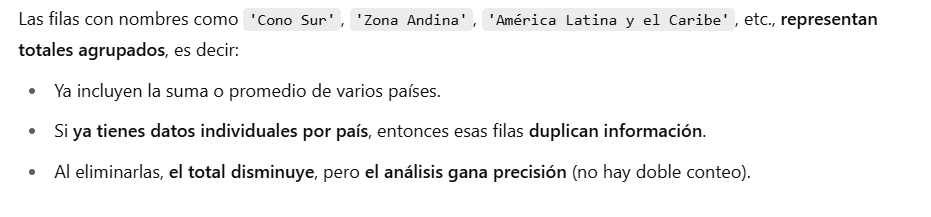

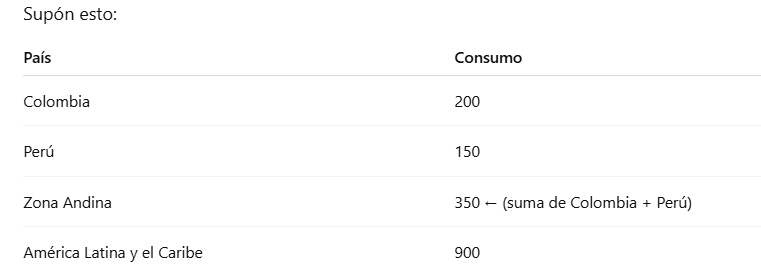

## **Filtrar por año entre 1991 y 2023**

In [ ]:
print(sorted(generacion_electrica_df['Año'].unique()))
print(sorted(consumo_df_copia['Año'].unique()))


[np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
[np.int32(1970), np.int32(1971), np.int32(1972), np.int32(1973), np.int32(1974), np.int32(1975), np.int32(1976), np.int32(1977), np.int32(1978), np.int32(1979), np.int32(1980), np.int32(1981), np.int32(1982), np.int32(1983), np.int32(1984), np.int32(1985), np.int32(1986), np.int32(1987), np.int32(1988), np.int32(1989), np.int32(1990), np.int32(1991), np.int32(1992), np.int32(1993), np.int32(1994), np.int32(1995), np.int32(1996), np.int32(1997), np.int32(1998), np.int

In [ ]:
print("\n--- Nulos restantes en consumo ---")
print(consumo_df_copia.isnull().sum())

print("\n--- Nulos restantes en generación ---")
print(generacion_electrica_df_copia.isnull().sum())



--- Nulos restantes en consumo ---
Indicador       0
Sector          0
País            0
Año             0
Valor        2890
Unidad          0
Región          0
dtype: int64

--- Nulos restantes en generación ---
Indicador       0
Fuente          0
País            0
Año             0
Valor        1609
Unidad          0
Región          0
dtype: int64


In [ ]:
# ========================
# PORCENTAJE DE NULOS ELIMINADOS DINÁMICAMENTE
# ========================
anterior_consumo = len(consumo_df_copia)
consumo_df_copia = consumo_df_copia[consumo_df_copia['Año'] >= 1991].reset_index(drop=True)
posterior_consumo = len(consumo_df_copia)

eliminados = anterior_consumo - posterior_consumo
porcentaje = (eliminados / anterior_consumo) * 100
print(f"\nEl porcentaje de datos eliminados en consumo por filtro de año es: {porcentaje:.2f}%")

print("\n--- Nulos restantes en consumo_df_copia ---")
print(consumo_df_copia.isnull().sum())

print("\n--- Nulos restantes en generacion_electrica_df_copia ---")
print(generacion_electrica_df_copia.isnull().sum())



El porcentaje de datos eliminados en consumo por filtro de año es: 38.89%

--- Nulos restantes en consumo_df_copia ---
Indicador       0
Sector          0
País            0
Año             0
Valor        1536
Unidad          0
Región          0
dtype: int64

--- Nulos restantes en generacion_electrica_df_copia ---
Indicador       0
Fuente          0
País            0
Año             0
Valor        1609
Unidad          0
Región          0
dtype: int64


# **Cuántos registros tienen valor NO NULO en la columna 'Valor'**

In [ ]:

validos_consumo = consumo_df_copia['Valor'].notnull().sum()
validos_generacion = generacion_electrica_df_copia['Valor'].notnull().sum()

print(f"\nRegistros válidos (no nulos) en 'Valor' - consumo_df_copia: {validos_consumo}")
print(f"Registros válidos (no nulos) en 'Valor' - generacion_electrica_df_copia: {validos_generacion}")



Registros válidos (no nulos) en 'Valor' - consumo_df_copia: 3810
Registros válidos (no nulos) en 'Valor' - generacion_electrica_df_copia: 3567


In [ ]:
consumo_df_copia

,Indicador,Sector,País,Año,Valor,Unidad,Región
0,Consumo de electricidad,Transporte,Argentina,1991,246.539993,GWh,América del Sur
1,Consumo de electricidad,Transporte,Barbados,1991,NaN,GWh,Caribe
2,Consumo de electricidad,Transporte,Belice,1991,NaN,GWh,América Central
3,Consumo de electricidad,Transporte,Bolivia,1991,NaN,GWh,América del Sur
4,Consumo de electricidad,Transporte,Brasil,1991,1080.717285,GWh,América del Sur
...,...,...,...,...,...,...,...
5341,Consumo de electricidad,Construcción y otros,República Dominicana,2023,NaN,GWh,Caribe
5342,Consumo de electricidad,Construcción y otros,Suriname,2023,NaN,GWh,América del Sur
5343,Consumo de electricidad,Construcción y otros,Trinidad & Tobago,2023,NaN,GWh,Caribe
5344,Consumo de electricidad,Construcción y otros,Uruguay,2023,379.122253,GWh,América del Sur


In [ ]:
generacion_electrica_df_copia

,Indicador,Fuente,País,Año,Valor,Unidad,Región
0,Generación eléctrica por fuente,Hidro,Guatemala,1991,1811.489990,GWh,América Central
1,Generación eléctrica por fuente,Térmica no renovable,Guatemala,1991,651.900024,GWh,América Central
2,Generación eléctrica por fuente,Nuclear,Guatemala,1991,NaN,GWh,América Central
3,Generación eléctrica por fuente,Geotermia,Guatemala,1991,0.000000,GWh,América Central
4,Generación eléctrica por fuente,Eólica,Guatemala,1991,0.000000,GWh,América Central
...,...,...,...,...,...,...,...
5171,Generación eléctrica por fuente,Geotermia,Venezuela,2023,NaN,GWh,América del Sur
5172,Generación eléctrica por fuente,Eólica,Venezuela,2023,17.198404,GWh,América del Sur
5173,Generación eléctrica por fuente,Solar,Venezuela,2023,1.207064,GWh,América del Sur
5174,Generación eléctrica por fuente,Térmica renovable,Venezuela,2023,0.000000,GWh,América del Sur


# **Calcular total por región y año**

In [ ]:
# Consumo total por región
consumo_region = consumo_df_copia.groupby(['Año', 'Región'])['Valor'].sum().reset_index()
generacion_region = generacion_electrica_df_copia.groupby(['Año', 'Región'])['Valor'].sum().reset_index()
consumo_region

,Año,Región,Valor
0,1991,América Central,1.071640e+05
1,1991,América del Sur,3.797960e+05
2,1991,Caribe,1.945603e+04
3,1992,América Central,1.108112e+05
4,1992,América del Sur,3.929219e+05
...,...,...,...
94,2022,América del Sur,1.005607e+06
95,2022,Caribe,4.671543e+04
96,2023,América Central,3.640334e+05
97,2023,América del Sur,1.035403e+06


# **VERIFICAMOS QUE TODO QUEDO BIEN**

# Verifica si aún quedan filas con nombres de regiones agrupadas

In [ ]:
regiones_invalidas = ['América Latina y el Caribe', 'América del Sur', 'América Central', 'Caribe']

print(consumo_df_copia[consumo_df_copia['País'].isin(regiones_invalidas)])
print(generacion_electrica_df_copia[generacion_electrica_df_copia['País'].isin(regiones_invalidas)])



Empty DataFrame
Columns: [Indicador, Sector, País, Año, Valor, Unidad, Región]
Index: []
Empty DataFrame
Columns: [Indicador, Fuente, País, Año, Valor, Unidad, Región]
Index: []


# Verificar si hay valores nulos en la columna Región

In [ ]:
#TODOS DEBEN SALIR EN 0
print(consumo_df_copia['Región'].isnull().sum())
print(generacion_electrica_df_copia['Región'].isnull().sum())

0
0


# Contar cuántos registros hay por región

In [ ]:
print("consumo_df_copia: " ,consumo_df_copia['Región'].value_counts())
print("\n generacion_electrica_df_copia: ",generacion_electrica_df_copia['Región'].value_counts())

consumo_df_copia:  Región
América del Sur    2376
América Central    1584
Caribe             1386
Name: count, dtype: int64

 generacion_electrica_df_copia:  Región
América del Sur    2304
América Central    1568
Caribe             1304
Name: count, dtype: int64


# **GRAFICO EJEMPLO LESLIN**

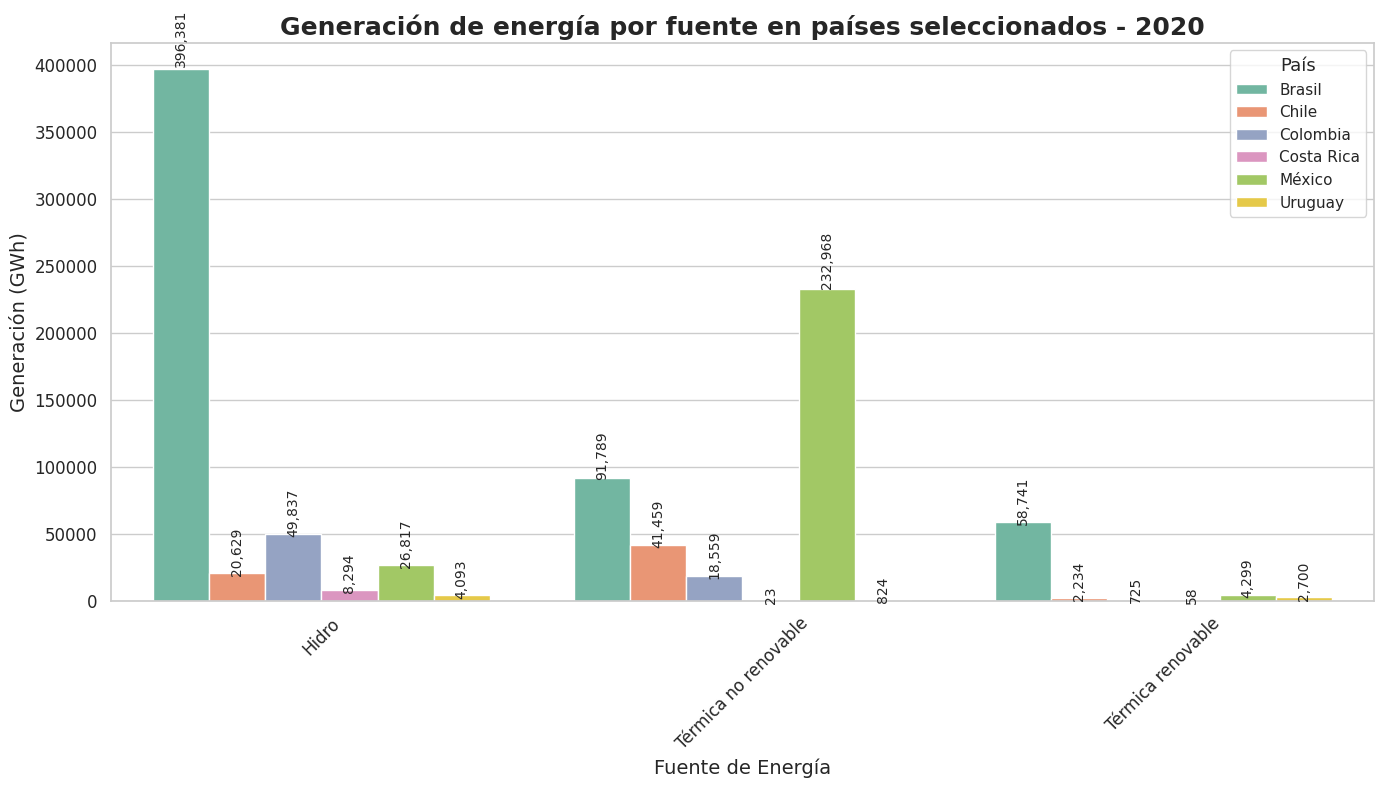

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fuentes a analizar
mis_fuentes = ['Hidro', 'Térmica no renovable','Térmica renovable']

# Países acomparar
paises_clave = ['Colombia', 'Brasil', 'Chile', 'Costa Rica', 'Uruguay', 'México']

# Años a filtrar
anios_seleccionados = [2020]  # se puede usar varios[2015, 2020, 2023] si


# FILTRAR LOS DATOS según nuestras condiciones:
# - Que el año esté en la lista anios_seleccionados
# - Que la fuente esté en mis_fuentes
# - Que el país esté en paises_clave
df_filtrado = generacion_electrica_df_copia[
    (generacion_electrica_df_copia['Año'].isin(anios_seleccionados)) &
    (generacion_electrica_df_copia['Fuente'].isin(mis_fuentes)) &
    (generacion_electrica_df_copia['País'].isin(paises_clave))
]

# Agrupar datos
# Para que quede así: por cada país, fuente y año → sumar la generación (en GWh)
df_grafico = df_filtrado.groupby(['Año', 'País', 'Fuente'])['Valor'].sum().reset_index()

# ----- HACER EL GRÁFICO -----
sns.set(style="whitegrid")# Fondo blanco con líneas grises
plt.figure(figsize=(14, 8)) # Tamaño grande del gráfico

# Crear gráfico de barras
grafico = sns.barplot(
    data=df_grafico,          # Los datos agrupados que creamos
    x='Fuente',               # En el eje X: tipo de energía (Hidro, Térmica...)
    y='Valor',                # En el eje Y: cantidad generada
    hue='País',               # Cada país con su color diferente
    errorbar=None,            # No mostrar líneas de error
    palette='Set2'            # Paleta de colores suave
)



# Título dinámico según los años seleccionados
titulo = "Generación de energía por fuente en países seleccionados - "
if len(anios_seleccionados) == 1:
    titulo += str(anios_seleccionados[0])
else:
    titulo += f"Años {min(anios_seleccionados)}-{max(anios_seleccionados)}"# ejemplo: titulo += "Años 2015–2023"/Esto se usa cuando queremos mostrar un rango de años automáticamente.


# Personalizar etiquetas y texto del gráfico
plt.title(titulo, fontsize=18, weight='bold')  # Título principal
plt.xlabel("Fuente de Energía", fontsize=14)   # Texto abajo del eje X
plt.ylabel("Generación (GWh)", fontsize=14)    # Texto al lado del eje Y
plt.xticks(fontsize=12, rotation=45)           # Tamaño y rotación de texto en X
plt.yticks(fontsize=12)                        # Tamaño de texto en Y
plt.legend(title="País", title_fontsize=13, fontsize=11, loc='upper right')# Leyenda
plt.tight_layout()# Ajuste automático del espacio del gráfico


# Añadir las etiquetas numéricas encima de cada barra
for barra in grafico.patches:# Recorre todas las barras del gráfico
    altura = barra.get_height() # Obtiene la altura de cada barra (valor generado)
    if altura > 0:
        grafico.text(
            x=barra.get_x() + barra.get_width() / 2,  # Posición horizontal centrada
            y=altura + (altura * 0.01),               # Posición vertical un poco arriba de la barra
            s=f"{int(altura):,}",                     # El valor con separador de miles (ej: 20,000)
            ha='center',                              # Centrado horizontal
            fontsize=10,
            rotation=90                               # Número girado en vertical
        )


plt.show()



# El grafico muestra que:
Brasil es el líder en generación hidroeléctrica (más de 390,000 GWh), lo cual es esperable por sus represas como Itaipú.

México tiene una gran generación térmica no renovable, lo que indica fuerte uso de combustibles fósiles.

Uruguay y Costa Rica tienen cifras muy pequeñas en fuentes no renovables, lo cual puede indicar una matriz energética más limpia.

Chile y Colombia tienen una combinación moderada de hidro y térmica.

In [ ]:
#Imprime que hay en la columna Fuente de generacion_electrica_df
print("generacion_electrica_df_copia: ",generacion_electrica_df_copia['Fuente'].unique(),'\n')

generacion_electrica_df_copia:  ['Hidro' 'Térmica no renovable' 'Nuclear' 'Geotermia' 'Eólica' 'Solar'
 'Térmica renovable' 'Total'] 



In [ ]:
print("generacion_electrica_df_copia: ",consumo_df_copia['Sector'].unique(),'\n')

generacion_electrica_df_copia:  ['Transporte' 'Industrial' 'Residencial' 'Comercial, servicios, público'
 'Agro, pesca y minería' 'Construcción y otros'] 



In [ ]:
df_filtrado = generacion_electrica_df_copia[generacion_electrica_df_copia["Fuente"] != "Total"]
generacion_por_fuente = df_filtrado.groupby("Fuente")["Valor"].sum()
generacion_por_fuente

,Valor
Fuente,
Eólica,9.186751e+05
Geotermia,2.250013e+05
Hidro,1.668321e+07
Nuclear,7.551984e+05
Solar,3.277518e+05
Térmica no renovable,1.253616e+07
Térmica renovable,1.036655e+06


# **GRAFICOS**

Relación entre generación por fuente ('Hidro' 'Térmica no renovable' 'Nuclear' 'Geotermia' 'Eólica' 'Solar'
 'Térmica renovable' ) por región.

In [ ]:
#Agrupar por tipo de sector y sumar la energía consumida
consumo_por_sector = consumo_df_copia.groupby("Sector")["Valor"].sum()
consumo_por_sector

,Valor
Sector,
"Agro, pesca y minería",2.259705e+06
"Comercial, servicios, público",6.633556e+06
Construcción y otros,1.508211e+06
Industrial,1.282849e+07
Residencial,9.215685e+06
Transporte,1.377454e+05


In [ ]:
"""## Grafica de pastel
plt.figure(figsize=(10, 8))
plt.pie(consumo_por_sector,
        labels=consumo_por_sector.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors)

# Personalizar
plt.title("Distribución de Energía Eléctrica consumida por sector\n")
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()

# Mostrar gráfico
plt.show()"""

'## Grafica de pastel\nplt.figure(figsize=(10, 8))\nplt.pie(consumo_por_sector,\n        labels=consumo_por_sector.index,\n        autopct=\'%1.1f%%\',\n        startangle=140,\n        colors=plt.cm.Paired.colors)\n\n# Personalizar\nplt.title("Distribución de Energía Eléctrica consumida por sector\n")\nplt.axis(\'equal\')  # Para que sea un círculo perfecto\nplt.tight_layout()\n\n# Mostrar gráfico\nplt.show()'

In [ ]:
import plotly.graph_objects as go

# Datos (ya agrupados)
valores = consumo_por_sector.values
etiquetas = consumo_por_sector.index

# Crear gráfico
fig = go.Figure(data=[go.Pie(
    labels=etiquetas,
    values=valores,
    hole=0,  # 0 para pastel completo, >0 para tipo dona
    textinfo='percent+label',
    textfont_size=18,
    textfont_color='white',  # TEXTO BLANCO dentro del pastel
    marker=dict(colors=px.colors.qualitative.Pastel)
)])

# Ajustes de diseño
fig.update_layout(
    title={
        'text': "Distribución de Energía Eléctrica Consumida por Sector",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=24, color='white')
    },
    font=dict(size=16, color='white'),  # Texto general
    width=900,
    height=800,
    paper_bgcolor='rgba(0,0,0,0)',   # Fondo transparente
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=True
)

fig.show()


In [ ]:
"""## Grafica de pastel
plt.figure(figsize=(8, 8))
plt.pie(generacion_por_fuente,
        labels=generacion_por_fuente.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors)

# Personalizar
plt.title("Distribución de Energía generada por Fuente")
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()

# Mostrar gráfico
plt.show()"""

'## Grafica de pastel\nplt.figure(figsize=(8, 8))\nplt.pie(generacion_por_fuente,\n        labels=generacion_por_fuente.index,\n        autopct=\'%1.1f%%\',\n        startangle=140,\n        colors=plt.cm.Paired.colors)\n\n# Personalizar\nplt.title("Distribución de Energía generada por Fuente")\nplt.axis(\'equal\')  # Para que sea un círculo perfecto\nplt.tight_layout()\n\n# Mostrar gráfico\nplt.show()'

In [ ]:
# ========================
# 8. VISUALIZACIÓN INTERACTIVA: CONSUMO EN COLOMBIA
# ========================
consumo_colombia = consumo_df_copia[consumo_df_copia['País'] == 'Colombia']
fig1 = px.line(
    consumo_colombia,
    x='Año', y='Valor', color='Sector',
    title='Consumo de Electricidad por Sector en Colombia (1991-2023)',
    labels={'Valor': 'Consumo (GWh)'}
)
fig1.show()


In [ ]:
# ========================
# 9. MAPA INTERACTIVO ANIMADO
# ========================
consumo_agrupado = consumo_df_copia.groupby(['País', 'Año'])['Valor'].sum().reset_index()

country_translation = {
    'Argentina': 'Argentina', 'Barbados': 'Barbados', 'Belice': 'Belize',
    'Bolivia': 'Bolivia', 'Brasil': 'Brazil', 'Chile': 'Chile',
    'Colombia': 'Colombia', 'Costa Rica': 'Costa Rica', 'Cuba': 'Cuba',
    'Ecuador': 'Ecuador', 'El Salvador': 'El Salvador', 'Granada': 'Grenada',
    'Guatemala': 'Guatemala', 'Guyana': 'Guyana', 'Haiti': 'Haiti',
    'Honduras': 'Honduras', 'Jamaica': 'Jamaica', 'México': 'Mexico',
    'Nicaragua': 'Nicaragua', 'Panamá': 'Panama', 'Paraguay': 'Paraguay',
    'Perú': 'Peru', 'República Dominicana': 'Dominican Republic',
    'Suriname': 'Suriname', 'Trinidad & Tobago': 'Trinidad and Tobago',
    'Uruguay': 'Uruguay', 'Venezuela': 'Venezuela'
}

consumo_agrupado['country_en'] = consumo_agrupado['País'].map(country_translation)
gapminder = px.data.gapminder()[['country', 'iso_alpha']]
df_mapa = pd.merge(consumo_agrupado, gapminder, left_on='country_en', right_on='country', how='left')
df_mapa.drop(columns='country', inplace=True)
df_mapa.dropna(subset=['iso_alpha'], inplace=True)

fig2 = px.choropleth(
    df_mapa,
    locations="iso_alpha",
    color="Valor",
    hover_name="País",
    animation_frame="Año",
    range_color=(df_mapa['Valor'].min(), df_mapa['Valor'].max()),
    title="Consumo de Electricidad por País en América Latina y el Caribe (1991-2023)",
    labels={'Valor': 'Consumo (GWh)'}
)

fig2.update_layout(
    geo=dict(
        projection_type='equirectangular', center=dict(lat=-15, lon=-60),
        lataxis_range=[-50, 30], lonaxis_range=[-100, -30],
        showframe=False, showcoastlines=False
    ),
    width=800, height=600
)
fig2.show()

**Apreciaciones**

El resultado de la prueba Chi-Cuadrado sugiere que no hay una diferencia estadísticamente significativa en la distribución del consumo de electricidad entre los diferentes sectores durante los años 2020, 2021 y 2022. Esto implica que, a pesar de la pandemia, la proporción de consumo de electricidad por cada sector se mantuvo relativamente constante en este período.

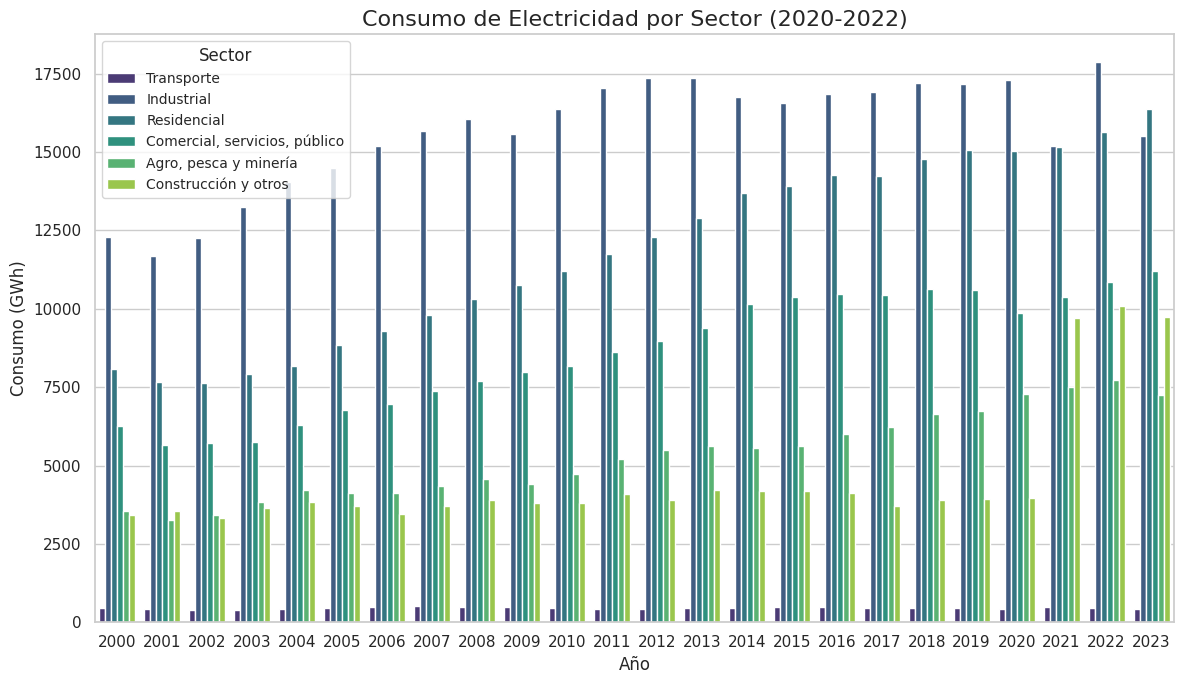

In [ ]:
consumo_pandemia_filtered = consumo_df_copia[consumo_df_copia['Año'].between(2000, 2023)]

plt.figure(figsize=(12, 7))
sns.barplot(data=consumo_pandemia_filtered, x='Año', y='Valor', hue='Sector', errorbar=None, palette='viridis')
plt.title('Consumo de Electricidad por Sector (2020-2022)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo (GWh)', fontsize=12)
plt.legend(title='Sector', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
generacion_pandemia = generacion_electrica_df_copia[generacion_electrica_df_copia['Año'].between(2000,2023)]
generacion_por_fuente_año = generacion_pandemia.groupby(['Fuente', 'Año'])['Valor'].sum().reset_index()

In [ ]:
display(generacion_por_fuente_año)

,Fuente,Año,Valor
0,Eólica,2000,44.254307
1,Eólica,2001,92.542931
2,Eólica,2002,201.753754
3,Eólica,2003,376.008759
4,Eólica,2004,481.498108
...,...,...,...
187,Térmica renovable,2019,70574.234375
188,Térmica renovable,2020,75528.398438
189,Térmica renovable,2021,73225.257812
190,Térmica renovable,2022,70027.812500


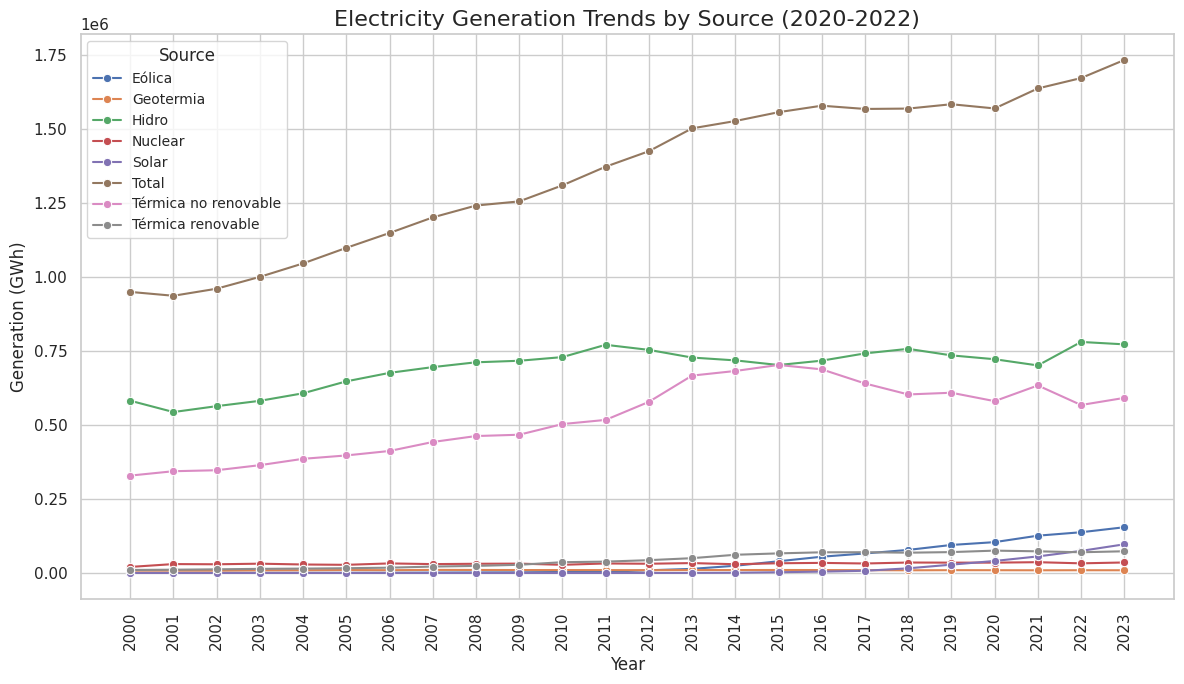

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=generacion_por_fuente_año, x='Año', y='Valor', hue='Fuente', marker='o')
plt.title('Electricity Generation Trends by Source (2020-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Generation (GWh)', fontsize=12)
plt.xticks(generacion_por_fuente_año['Año'].unique(), rotation=90)
plt.legend(title='Source', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

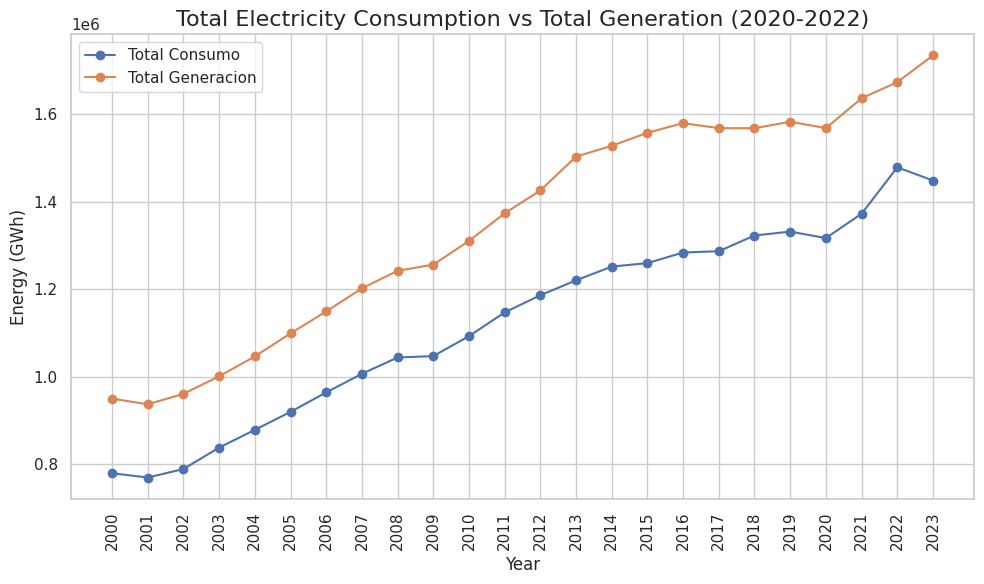

In [ ]:
# Calculate total annual consumption for 2020-2022
total_consumo_pandemia = consumo_df_copia[consumo_df_copia['Año'].between(2000,2023)].groupby('Año')['Valor'].sum().reset_index()
total_consumo_pandemia.rename(columns={'Valor': 'Total Consumo'}, inplace=True)

# Calculate total annual generation for 2020-2022, excluding 'Total' source
total_generacion_pandemia = generacion_electrica_df_copia[
    (generacion_electrica_df_copia['Año'].between(2000,2023)) &
    (generacion_electrica_df_copia['Fuente'] != 'Total')
].groupby('Año')['Valor'].sum().reset_index()
total_generacion_pandemia.rename(columns={'Valor': 'Total Generacion'}, inplace=True)

# Merge the consumption and generation dataframes
consumo_generacion_total = pd.merge(total_consumo_pandemia, total_generacion_pandemia, on='Año')

# Create a line plot to visualize the total consumption and generation trends
plt.figure(figsize=(10, 6))
plt.plot(consumo_generacion_total['Año'], consumo_generacion_total['Total Consumo'], marker='o', label='Total Consumo')
plt.plot(consumo_generacion_total['Año'], consumo_generacion_total['Total Generacion'], marker='o', label='Total Generacion')

plt.title('Total Electricity Consumption vs Total Generation (2020-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)
plt.xticks(consumo_generacion_total['Año'],rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

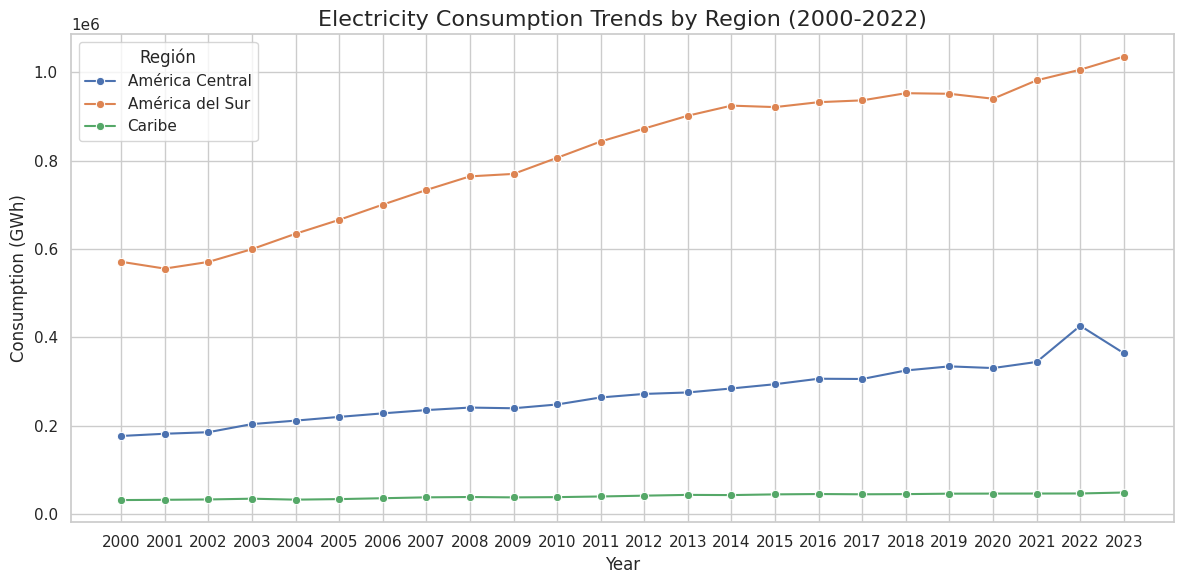

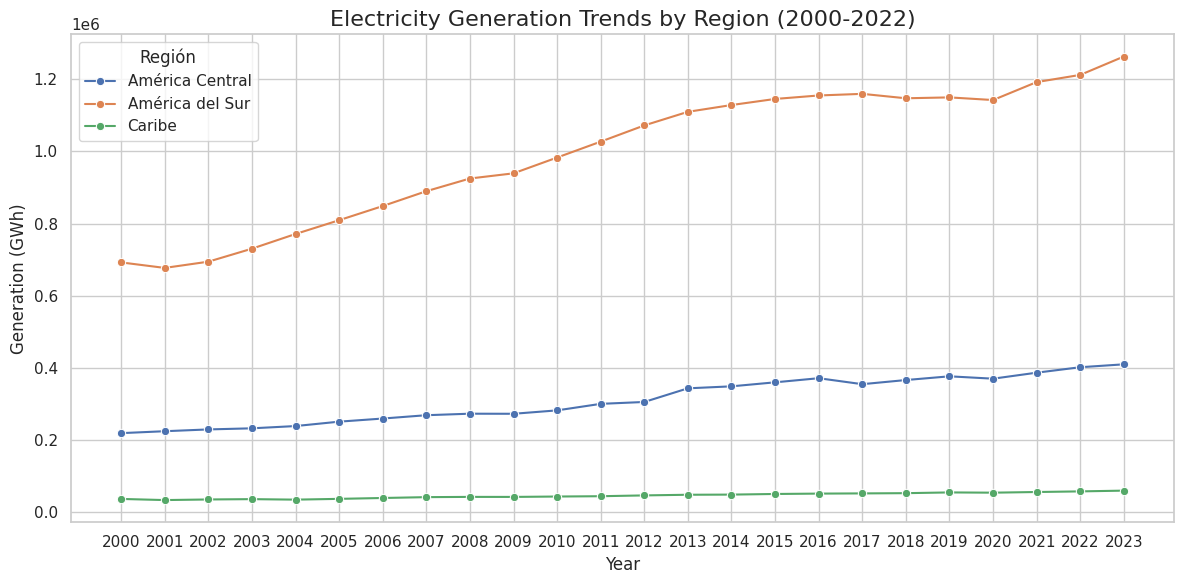

In [ ]:
consumo_pandemia_region = consumo_df_copia[consumo_df_copia['Año'].between(2000,2023)].reset_index(drop=True)
generacion_pandemia_region = generacion_electrica_df_copia[
    (generacion_electrica_df_copia['Año'].between(2000,2023)) &
    (generacion_electrica_df_copia['Fuente'] != 'Total')
].reset_index(drop=True)

consumo_region_año = consumo_pandemia_region.groupby(['Región', 'Año'])['Valor'].sum().reset_index()
generacion_region_año = generacion_pandemia_region.groupby(['Región', 'Año'])['Valor'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=consumo_region_año, x='Año', y='Valor', hue='Región', marker='o')
plt.title('Electricity Consumption Trends by Region (2000-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Consumption (GWh)', fontsize=12)
plt.xticks(consumo_region_año['Año'].unique())
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=generacion_region_año, x='Año', y='Valor', hue='Región', marker='o')
plt.title('Electricity Generation Trends by Region (2000-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Generation (GWh)', fontsize=12)
plt.xticks(generacion_region_año['Año'].unique())
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingencia, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Consumo eléctrico por sector y año (GWh)")
plt.ylabel("Sector")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

NameError: name 'contingencia' is not defined

<Figure size 800x600 with 0 Axes>

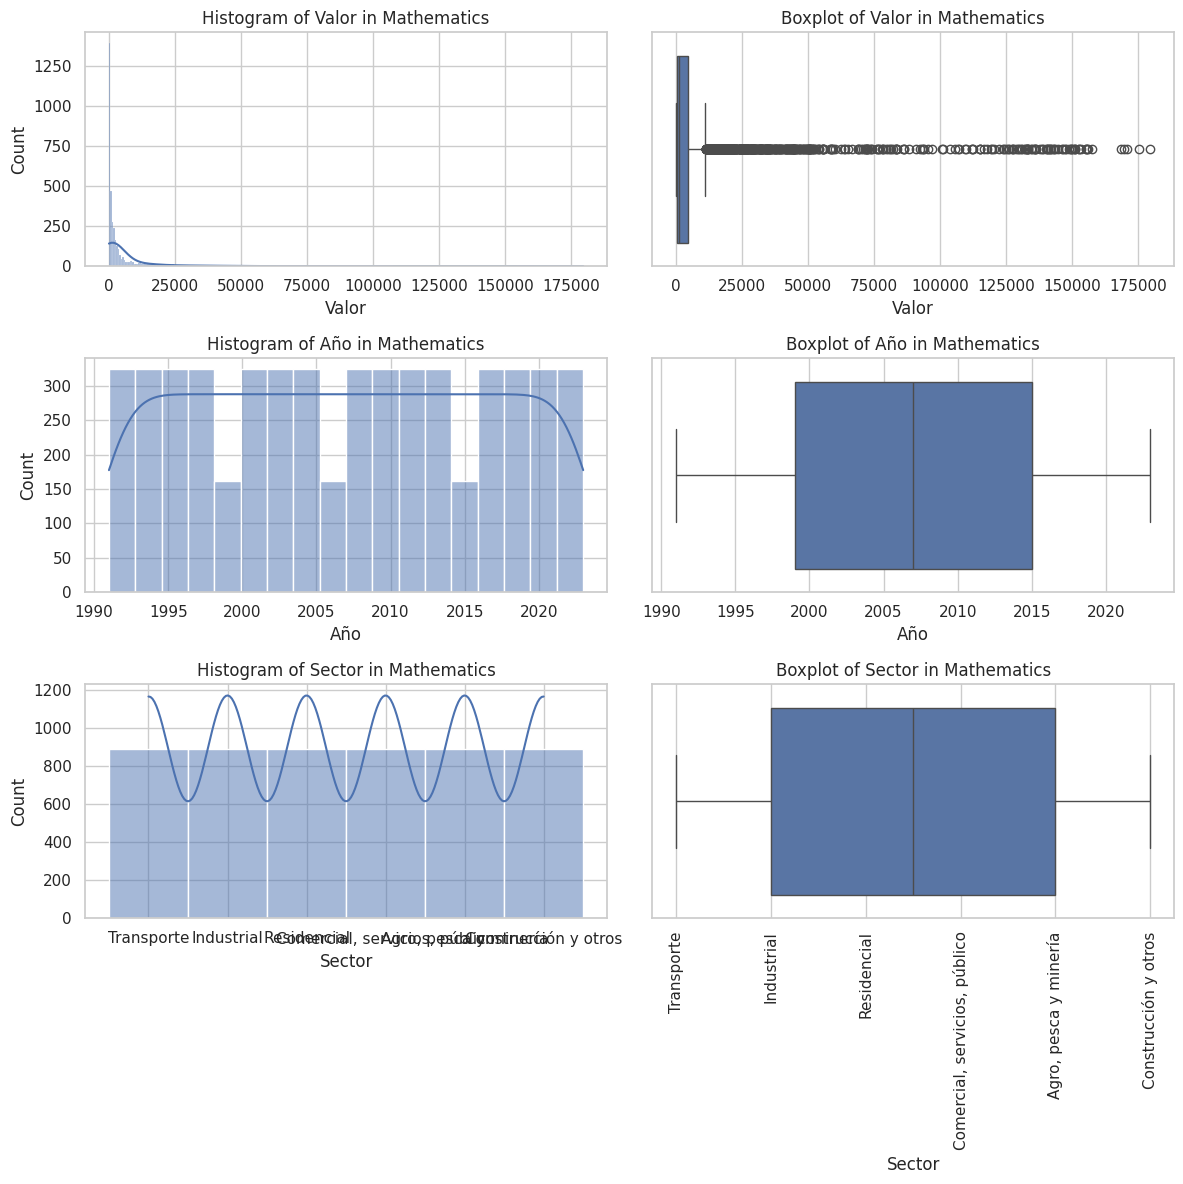

In [ ]:
##Creo funcion de graficas
##Una funcion sirve para ahorrar 'codigo'
def plot_histograms_boxplots(data,columns,dataset_name):
  fig, axes = plt.subplots(len(columns),2,figsize=(12,4*len(columns)))
  for i, col in enumerate(columns):
    #Histograma
    sns.histplot(data[col],kde=True,ax=axes[i,0])
    axes[i,0].set_title(f'Histogram of {col} in {dataset_name}')
    #diagrama de cajas
    sns.boxplot(x=data[col],ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col} in {dataset_name}')
    plt.xticks(rotation=90)
  plt.tight_layout() ##Ajustar graficos

##columnas de interes
columns=['Valor','Año','Sector']
#Graficando dataset de los estudiantes de matematicas
plot_histograms_boxplots(consumo_df_copia,columns,'Mathematics')

In [ ]:
from scipy.stats import norm, kurtosis

lista=['Año','Valor']
for i in lista:
  curtosis=kurtosis(consumo_df_copia[i])
  print(f'Curtosis de {i}, es igual a: {curtosis}')

# **Prueba  de hipotesis T-Student para series de tiempo, se evalua el crecimiento un valor respecto a una media de valor de tiempo**

In [ ]:
consumo_2000_2023=consumo_df_copia[consumo_df_copia['Año'].between(2000,2023)]

In [ ]:
generacion_2000_2023=generacion_electrica_df_copia[generacion_electrica_df_copia['Año'].between(2000,2023)]
#columns=['Fuente','Año','Valor']

In [ ]:
# Año de corte
año_corte = 2012

# Lista para resultados
resultados = []
#Aquí se van a guardar los resultados del análisis para cada sector (media antes, media después, p-value, etc.).
# Excluir la fuente "Total"
fuentes_validas = generacion_2000_2023[generacion_2000_2023['Fuente'] != 'Total']

for fuente in fuentes_validas['Fuente'].unique():
    datos_fuente = fuentes_validas[fuentes_validas['Fuente'] == fuente]

    # Eliminar NaNs
    antes = datos_fuente[datos_fuente['Año'] < año_corte]['Valor'].dropna()
    despues = datos_fuente[datos_fuente['Año'] >= año_corte]['Valor'].dropna()

    # Validar condiciones mínimas
    if len(antes) >= 2 and len(despues) >= 2:
        if np.var(antes, ddof=1) > 0 and np.var(despues, ddof=1) > 0:
          #La t-student necesita que los datos varíen. Si todos los valores son iguales, la varianza es 0 y la prueba falla.
            t_stat, p_val = ttest_ind(antes, despues, equal_var=False)
            #t_stat: estadístico t.
            #p_val: probabilidad de que las medias sean iguales (hipótesis nula).
            #equal_var=False: usa la versión Welch de la t-student, que no asume igual varianza entre los grupos.
        else:
            t_stat, p_val = np.nan, np.nan
    else:
        t_stat, p_val = np.nan, np.nan

    resultados.append({
        'Fuente': fuente,
        'Media Antes': antes.mean() if not antes.empty else np.nan,
        'Media Después': despues.mean() if not despues.empty else np.nan,
        't-stat': t_stat,
        'p-value': p_val,
        'Significativo': 'Sí' if isinstance(p_val, float) and p_val < 0.05 else 'No'
    })

# Convertir a DataFrame
df_resultadosG = pd.DataFrame(resultados)

# Mostrar resultados
display(df_resultadosG)

,Fuente,Media Antes,Media Después,t-stat,p-value,Significativo
0,Hidro,27668.523438,30999.558594,-0.533488,0.593907,No
1,Térmica no renovable,15841.090820,23295.021484,-2.183413,0.029407,Sí
2,Nuclear,4892.477539,6295.937988,-1.411353,0.160620,No
3,Geotermia,948.242371,957.811584,-0.041424,0.966995,No
4,Eólica,81.515541,3612.748291,-4.784744,0.000003,Sí
5,Solar,0.148057,1149.913208,-4.268393,0.000027,Sí
6,Térmica renovable,1545.815918,3371.981689,-2.184744,0.029576,Sí


In [ ]:
consumo_pandemia_filtered = consumo_df_copia[consumo_df_copia['Año'].isin([2020, 2021, 2022])]

plt.figure(figsize=(12, 7))
sns.barplot(data=consumo_pandemia_filtered, x='Año', y='Valor', hue='Sector', errorbar=None, palette='Blues')
plt.title('Consumo de Electricidad por Sector (2020-2022)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo (GWh)', fontsize=12)
plt.legend(title='Sector', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar orden claro en la gráfica
df_resultados_sorted = df_resultadosG.sort_values(by='Media Después', ascending=False)

# Configurar tamaño y estilo
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Crear la gráfica: barras agrupadas por fuente
bar_plot = sns.barplot(
    data=pd.melt(df_resultados_sorted,
                 id_vars=['Fuente', 'Significativo'],
                 value_vars=['Media Antes', 'Media Después'],
                 var_name='Periodo',
                 value_name='Consumo'),
    x='Fuente',
    y='Consumo',
    hue='Periodo',
    palette='Set2'
)

# Colorear bordes de barras según significancia
for i, (bar, signif) in enumerate(zip(bar_plot.patches, pd.melt(df_resultados_sorted, id_vars=['Fuente', 'Significativo'])['Significativo'])):
    color = 'black' if signif == 'Sí' else 'gray'
    bar.set_edgecolor(color)
    bar.set_linewidth(2)

# Mejoras visuales
plt.xticks(rotation=45, ha='right')
plt.title('Consumo de electricidad por fuente: Antes vs. Después de 2010')
plt.xlabel('Fuente')
plt.ylabel('Consumo promedio (MWh o unidad que corresponda)')
plt.legend(title='Periodo')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ordenar por media "Después" para mejor visualización
df_resultados_sorted = df_resultados.sort_values(by='Media Después', ascending=False)

# Reorganizar el DataFrame para graficar
df_melted = pd.melt(
    df_resultados_sorted,
    id_vars=['Sector', 'Significativo', 'p-value'],
    value_vars=['Media Antes', 'Media Después'],
    var_name='Periodo',
    value_name='Consumo'
)

# Crear la gráfica
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')

bar_plot = sns.barplot(
    data=df_melted,
    x='Sector',
    y='Consumo',
    hue='Periodo',
    palette='Set2'
)


# Colorear bordes de barras según significancia
for i, (bar, signif) in enumerate(zip(bar_plot.patches, pd.melt(df_resultados_sorted, id_vars=['Sector', 'Significativo'])['Significativo'])):
    color = 'black' if signif == 'Sí' else 'gray'
    bar.set_edgecolor(color)
    bar.set_linewidth(2)

# Mejoras visuales
plt.xticks(rotation=45, ha='right')
plt.title('Consumo por sector: comparación antes y después del 2010\n(con p-values sobre barras de "Después")')
plt.xlabel('Sector')
plt.ylabel('Consumo promedio')
plt.legend(title='Periodo')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

año_corte = 2010
resultados = []

for sector in consumo_2000_2023['Sector'].unique():
    datos_sector = consumo_2000_2023[consumo_2000_2023['Sector'] == sector]

    antes = datos_sector[datos_sector['Año'] < año_corte]['Valor'].dropna()
    despues = datos_sector[datos_sector['Año'] >= año_corte]['Valor'].dropna()

    if len(antes) >= 2 and len(despues) >= 2 and np.var(antes, ddof=1) > 0 and np.var(despues, ddof=1) > 0:
        # Prueba t bilateral
        t_stat, p_val_bilateral = ttest_ind(despues, antes, equal_var=False)
        # Convertir a p-value unilateral (mayor consumo después)
        if t_stat > 0:
            p_val = p_val_bilateral / 2
        else:
            p_val = 1 - (p_val_bilateral / 2)
    else:
        t_stat, p_val = np.nan, np.nan

    resultados.append({
        'Sector': sector,
        'Media Antes': antes.mean() if not antes.empty else np.nan,
        'Media Después': despues.mean() if not despues.empty else np.nan,
        't-stat': t_stat,
        'p-value unilateral': p_val,
        'Aumento significativo': 'Sí' if isinstance(p_val, float) and p_val < 0.05 else 'No'
    })

df_unilateral = pd.DataFrame(resultados)
display(df_unilateral)


,Sector,Media Antes,Media Después,t-stat,p-value unilateral,Aumento significativo
0,Transporte,455.347290,452.078400,-0.046381,0.518474,No
1,Industrial,14058.011719,16823.832031,0.990358,0.161189,No
2,Residencial,8852.916992,14025.459961,2.817578,0.002494,Sí
3,"Comercial, servicios, público",6650.049316,10012.674805,2.066772,0.019578,Sí
4,"Agro, pesca y minería",3998.903076,6260.346191,2.383309,0.008824,Sí
5,Construcción y otros,3633.829590,5405.514160,1.256902,0.104868,No


In [ ]:
from scipy.stats import ttest_ind
# Año de corte
año_corte = 2012
# Lista para resultados
resultados = []
#Aquí se van a guardar los resultados del análisis para cada sector (media antes, media después, p-value, etc.).
for sector in consumo_2000_2023['Sector'].unique():
    datos_sector = consumo_2000_2023[consumo_2000_2023['Sector'] == sector]
    # Eliminar NaNs
    antes = datos_sector[datos_sector['Año'] < año_corte]['Valor'].dropna()
    despues = datos_sector[datos_sector['Año'] >= año_corte]['Valor'].dropna()
    # Validar condiciones mínimas
    if len(antes) >= 2 and len(despues) >= 2:
        if np.var(antes, ddof=1) > 0 and np.var(despues, ddof=1) > 0:
          #La t-student necesita que los datos varíen. Si todos los valores son iguales, la varianza es 0 y la prueba falla.
            t_stat, p_val = ttest_ind(antes, despues, equal_var=False)
            #t_stat: estadístico t.
            #p_val: probabilidad de que las medias sean iguales (hipótesis nula).
            #equal_var=False: usa la versión Welch de la t-student, que no asume igual varianza entre los grupos.
        else:
            t_stat, p_val = np.nan, np.nan
    else:
        t_stat, p_val = np.nan, np.nan

    resultados.append({
        'Sector': sector,
        'Media Antes': antes.mean() if not antes.empty else np.nan,
        'Media Después': despues.mean() if not despues.empty else np.nan,
        't-stat': t_stat,
        'p-value': p_val,
        'Significativo': 'Sí' if isinstance(p_val, float) and p_val < 0.05 else 'No'
    })
# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)
# Mostrar resultados
display(df_resultados)

,Sector,Media Antes,Media Después,t-stat,p-value,Significativo
0,Transporte,451.646240,454.279510,-0.037255,0.970312,No
1,Industrial,14502.637695,16841.548828,-0.822139,0.411309,No
2,Residencial,9292.286133,14449.539062,-2.651059,0.008254,Sí
3,"Comercial, servicios, público",6942.050293,10282.012695,-1.950446,0.051614,No
4,"Agro, pesca y minería",4169.308594,6466.434570,-2.301382,0.021970,Sí
5,Construcción y otros,3687.483643,5613.541992,-1.303412,0.193508,No
